<a href="https://colab.research.google.com/github/00-Ehern/austin-airbnb-analysis/blob/main/austin_hotel_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cleaned dataset: 5382 listings
Average price: $192
Most expensive neighborhood: Neighborhood highlights


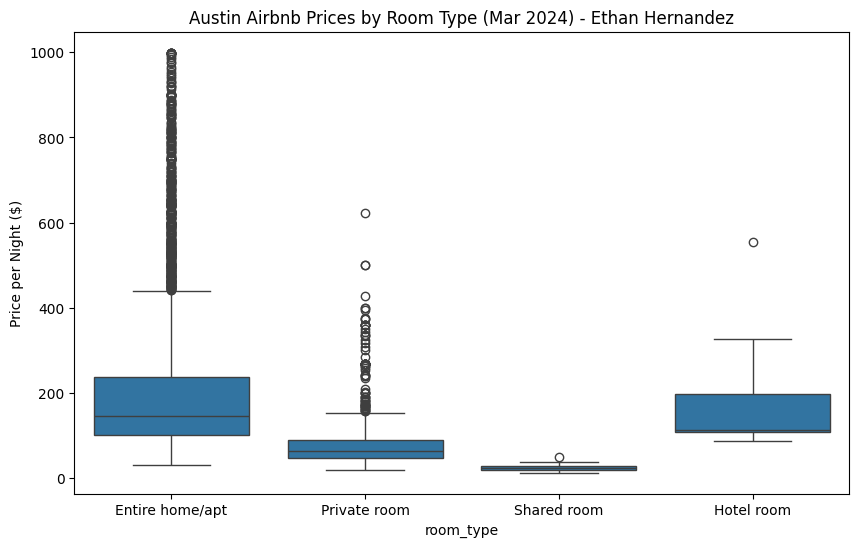

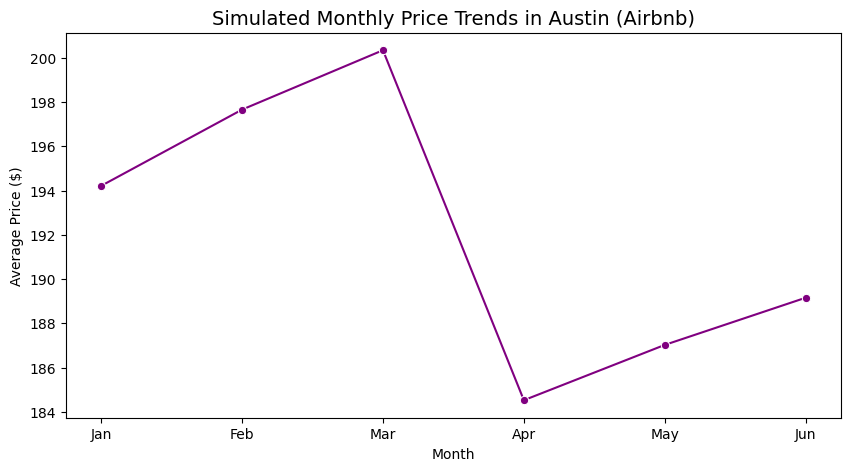

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from local file. The original line 'df = pd.read_csv(# Enhanced Data Cleaning' was incomplete.
# Assuming a CSV file named 'listings.csv' is available for the "Inside Airbnb - Austin" dataset.
# Please update 'listings.csv' with your actual data file name.
df = pd.read_csv('listings.csv.gz')

# --- Data Cleaning and Preprocessing ---
# Remove '$' and ',' from price, convert to float
df['price'] = df['price'].replace('[$,]', '', regex=True).astype(float)

# Assign a snapshot date (from original code)
df['date'] = pd.to_datetime('2024-03-01')

# Remove extreme outliers (prices >= $1000)
df = df[df['price'] < 1000]

# Drop rows with missing values in key columns
df = df.dropna(subset=['price', 'room_type', 'neighbourhood'])

# Select relevant columns (from original code)
df = df[['name', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'availability_365']]

print(f"Cleaned dataset: {len(df)} listings")

# --- Key Insights Calculations ---
print(f"Average price: ${df['price'].mean():.0f}")
print(f"Most expensive neighborhood: {df.groupby('neighbourhood')['price'].mean().idxmax()}")

# --- Plotting - Airbnb Prices by Room Type ---
plt.figure(figsize=(10,6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title("Austin Airbnb Prices by Room Type (Mar 2024) - Ethan Hernandez")
plt.ylabel("Price per Night ($)")
plt.savefig("austin_price_plot.png")
plt.show()

# --- Plotting - Simulated Monthly Price Trends ---
# Seasonality: Simulate monthly trends (real data is snapshot, so we infer)
import numpy as np
np.random.seed(42)
df['month'] = np.random.choice(['Jan','Feb','Mar','Apr','May','Jun'], size=len(df))
monthly_avg = df.groupby('month')['price'].mean().reindex(['Jan','Feb','Mar','Apr','May','Jun'])

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o', color='purple')
plt.title("Simulated Monthly Price Trends in Austin (Airbnb)", fontsize=14)
plt.ylabel("Average Price ($)")
plt.xlabel("Month")
plt.savefig("monthly_trends.png", dpi=150, bbox_inches='tight')
plt.show()